# Introduction
### Présentation des données
Les données utilisées dans ce projet proviennent d'éCO2mix, une application qui permet de mieux comprendre le système électrique en France. Elle a été développée par RTE, le gestionnaire du réseau de transport d'électricité français. 

On utilisera ici les données nationales de l'année 2023.

### Présentation du projet
Ce projet propose d'explorer et analyser les données :
* de consommation d'électricité
* et de production d'électricité

afin d'en tirer une première compréhension du système électrique français.

# Préparation des données

### Téléchargement du jeu de données

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display

filepath = "datasets/eCO2mix_RTE_Annuel-Definitif_2023.csv"
pre_data = pd.read_csv(filepath)
pre_data.head()

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
0,France,Données définitives,2023-01-01,00:00,47571.0,46600,48000,81.0,24.0,2418.0,...,4987.0,1224.0,743.0,534.0,431.0,333.0,0.0,0.0,14967.0,405.0
1,France,Données définitives,2023-01-01,00:15,NaN,46050,47500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2023-01-01,00:30,46342.0,45500,47000,68.0,24.0,2423.0,...,4792.0,1048.0,842.0,537.0,426.0,337.0,0.0,0.0,13847.0,404.0
3,France,Données définitives,2023-01-01,00:45,NaN,44650,46350,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2023-01-01,01:00,44790.0,43800,45700,67.0,25.0,2445.0,...,4781.0,1195.0,891.0,537.0,426.0,338.0,0.0,0.0,11471.0,404.0


### Data cleaning

Pour rendre les données plus faciles à exploiter, on effectue 2 opérations :
* On ajoute une colonne `Datetime` qui joint les colonnes `Date` et `Heures` pour créer un élément de type `datetime`, plus pratique pour certaines manipulations
* On supprime toutes les lignes avec des entrées vides. Le jeu de données est construit pour avoir une ligne toutes les 15 minutes, mais dans cette version les données sont fournies toutes les 30 minutes. Le code ci-dessous montre que la moitié des lignes ont des entrées vides. 


In [39]:
print("Nombre de lignes :", pre_data.shape[0])
print("Nombre d'entrées vides par colonne")
print(pre_data.isnull().sum())

Nombre de lignes : 35040
Nombre d'entrées vides par colonne
Périmètre                                   0
Nature                                      0
Date                                        0
Heures                                      0
Consommation                            17520
Prévision J-1                               0
Prévision J                                 0
Fioul                                   17520
Charbon                                 17520
Gaz                                     17520
Nucléaire                               17520
Eolien                                  17520
Solaire                                 17520
Hydraulique                             17520
Pompage                                 17520
Bioénergies                             17520
Ech. physiques                          17520
Taux de Co2                             17520
Ech. comm. Angleterre                   17520
Ech. comm. Espagne                      17520
Ech. comm. Italie   

In [40]:
#Suppression des entrées nulles
data = pre_data.copy().dropna().reset_index(drop=True)

#Création de la colonne Datetime
data["Datetime"] = pd.to_datetime(data["Date"] + " " + data["Heures"], format="%Y-%m-%d %H:%M")

#Une fonction utile pour convertir les heures en float
def dt_to_float(dt):
    return dt.dt.hour + dt.dt.minute/60
    
print("Nombre de lignes :", data.shape[0], "(= 48 * 365)")
data.head()

Nombre de lignes : 17520 (= 48 * 365)


,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,Datetime
0,France,Données définitives,2023-01-01,00:00,47571.0,46600,48000,81.0,24.0,2418.0,...,1224.0,743.0,534.0,431.0,333.0,0.0,0.0,14967.0,405.0,2023-01-01 00:00:00
1,France,Données définitives,2023-01-01,00:30,46342.0,45500,47000,68.0,24.0,2423.0,...,1048.0,842.0,537.0,426.0,337.0,0.0,0.0,13847.0,404.0,2023-01-01 00:30:00
2,France,Données définitives,2023-01-01,01:00,44790.0,43800,45700,67.0,25.0,2445.0,...,1195.0,891.0,537.0,426.0,338.0,0.0,0.0,11471.0,404.0,2023-01-01 01:00:00
3,France,Données définitives,2023-01-01,01:30,45276.0,44400,46200,67.0,24.0,2456.0,...,1134.0,838.0,542.0,431.0,335.0,0.0,0.0,10134.0,403.0,2023-01-01 01:30:00
4,France,Données définitives,2023-01-01,02:00,45246.0,44300,46000,67.0,23.0,2500.0,...,883.0,700.0,545.0,431.0,335.0,0.0,0.0,10040.0,402.0,2023-01-01 02:00:00


# Consommation d'électricité
On étudie ici la consommation d'électricité, et on propose de comparer cette consommation réelle aux prévisions. 

Pour simplifier les choses, on récupère une version réduite du jeu de données qui ne garde que ce qui nous intéresse. 

In [41]:
conso_data = data[["Datetime", "Consommation", "Prévision J-1", "Prévision J"]].copy()
conso_data.head()

,Datetime,Consommation,Prévision J-1,Prévision J
0,2023-01-01 00:00:00,47571.0,46600,48000
1,2023-01-01 00:30:00,46342.0,45500,47000
2,2023-01-01 01:00:00,44790.0,43800,45700
3,2023-01-01 01:30:00,45276.0,44400,46200
4,2023-01-01 02:00:00,45246.0,44300,46000


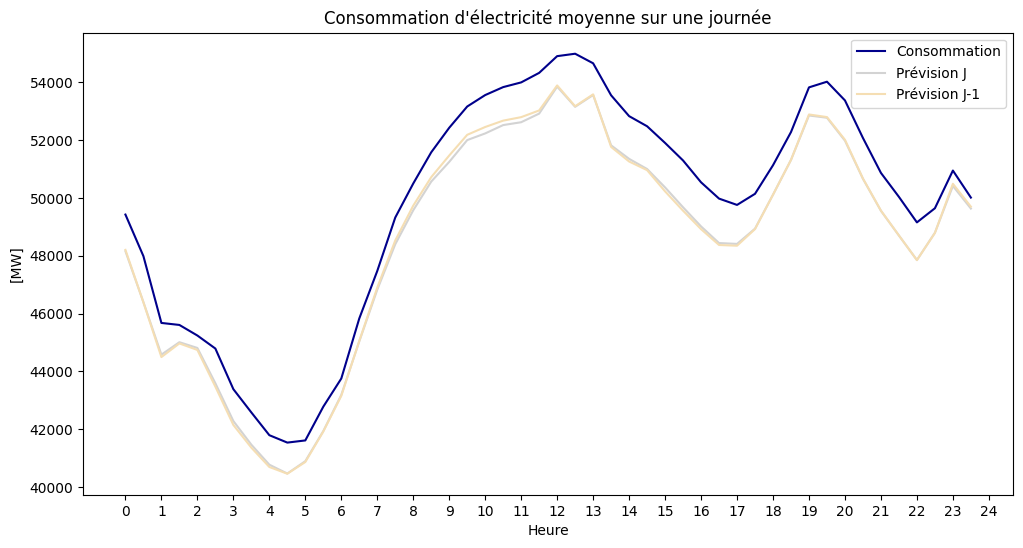

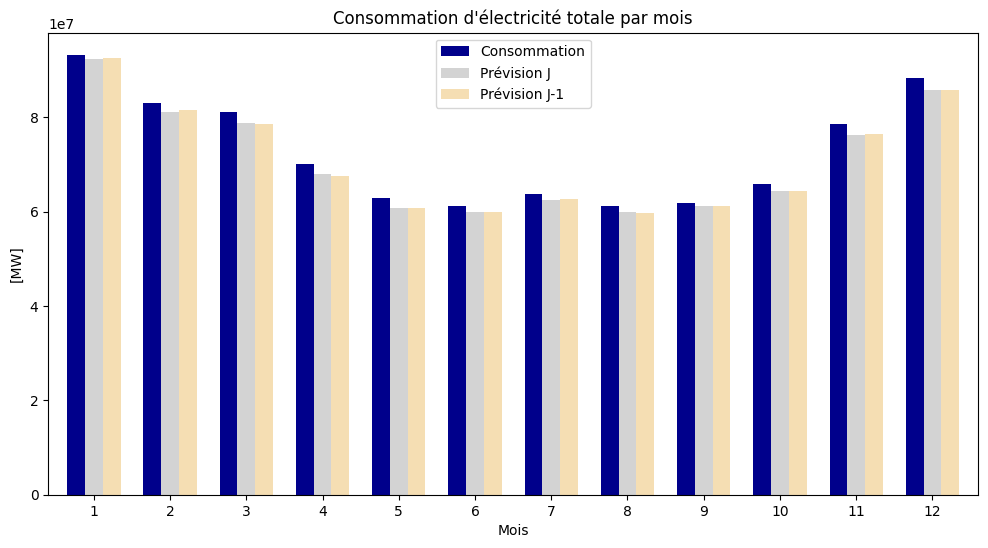

In [42]:
### 1ère figure
conso_by_hour = conso_data.groupby(dt_to_float(conso_data.Datetime))[["Consommation", "Prévision J", "Prévision J-1"]].mean()
conso_by_hour.plot.line(figsize=(12,6), xticks=range(0,25,1), color=["darkblue", "lightgrey", "wheat"],
                        xlabel="Heure", ylabel="[MW]", 
                        title="Consommation d'électricité moyenne sur une journée")
plt.show()


### 2ème figure
conso_by_month = conso_data.groupby(conso_data.Datetime.dt.month)[["Consommation", "Prévision J", "Prévision J-1"]].sum()
conso_by_month.plot.bar(figsize=(12,6), rot=0, color=["darkblue", "lightgrey", "wheat"],
                       xlabel="Mois", ylabel="[MW]",
                       title="Consommation d'électricité totale par mois", width=0.7)
plt.show()
                                                                                                                

### Remarques
* La consommation d’électricité est en général plus importante le jour que la nuit, et elle tend à être plus élevée en hiver qu’en été.
* L'écart entre les prévisions et la consommation réelle est relativement faible, et les prévisions tendent à être un peu en-dessous.

De plus, la distribution ci-dessous nous permet d'observer que la consommation totale d'électricité en France sur une journée est le plus souvent aux alentours de $2e6$  MW.

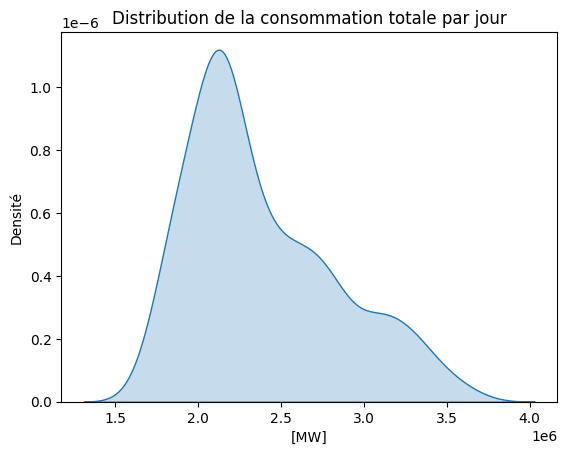

In [43]:
sns.kdeplot(conso_data.groupby(conso_data["Datetime"].dt.date)["Consommation"].sum(), fill=True)
plt.xlabel("[MW]") 
plt.ylabel("Densité")
plt.title("Distribution de la consommation totale par jour")
plt.show()

# Production d'électricité
On s'intéresse maintenant à la production d'électricité par filière (fioul, charbon, gaz, nucléaire, éolien, solaire, hydraulique, bioénergies).

Encore une fois, on récupère un jeu de données réduit.

In [44]:
sources = ["Fioul", "Charbon", "Gaz", "Nucléaire", "Eolien", "Solaire", "Hydraulique", "Bioénergies"]
prod_data = data[["Datetime"] + sources].copy()
prod_data.head()

,Datetime,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies
0,2023-01-01 00:00:00,81.0,24.0,2418.0,25481.0,15371.0,0.0,6954.0,1298.0
1,2023-01-01 00:30:00,68.0,24.0,2423.0,25978.0,14251.0,0.0,6682.0,1300.0
2,2023-01-01 01:00:00,67.0,25.0,2445.0,25993.0,11874.0,0.0,6867.0,1301.0
3,2023-01-01 01:30:00,67.0,24.0,2456.0,25535.0,10537.0,0.0,6727.0,1309.0
4,2023-01-01 02:00:00,67.0,23.0,2500.0,25719.0,10442.0,0.0,6351.0,1311.0


Le code ci-dessous permet d'observer la production électrique (moyenne par heure et totale par mois) pour une filière spécifique au choix. 

In [45]:
prod_by_hour = prod_data.groupby(dt_to_float(prod_data.Datetime))[sources].mean()

### Widgets pour le choix
dropdown = widgets.Dropdown(
    options=sources,
    description="Filière",
)
button_prod = widgets.Button(description="Afficher")
output_prod = widgets.Output()

### Actualisation de l'affichage
def update_prod(x):
    output_prod.clear_output()
    with output_prod:
        choice = dropdown.value

        ### 1ère figure
        prod_by_hour[choice].plot.line(figsize=(12,6), xticks=range(0,25,1), 
                        xlabel="Heure", ylabel="[MW]", 
                        title=f"Production moyenne par heure (filière : {choice})")
        plt.show()

        ### 2ème figure
        plt.figure(figsize=(12,6))
        sns.barplot(prod_data.groupby(prod_data["Datetime"].dt.month)[choice].sum())
        plt.xlabel("Mois")
        plt.ylabel("[MW]")
        plt.title(f"Production totale par mois (filière : {choice})")
        plt.show()

### Mise en place
button_prod.on_click(update_prod)
display(dropdown, button_prod, output_prod)


Dropdown(description='Filière', options=('Fioul', 'Charbon', 'Gaz', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraul…

Button(description='Afficher', style=ButtonStyle())

Output()

On peut aussi observer la part de chaque filière dans la production d'électricité en France :

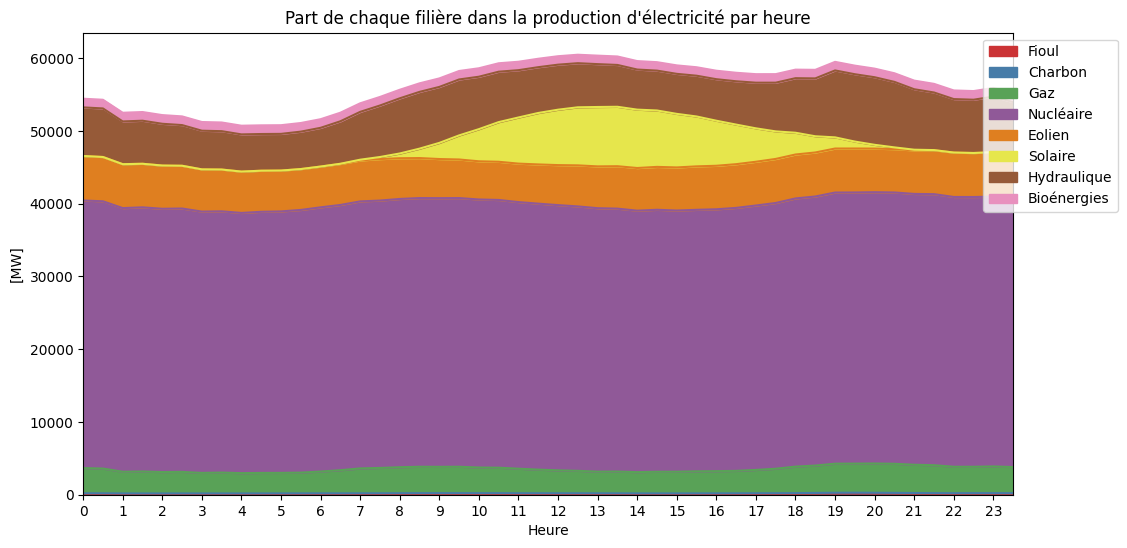

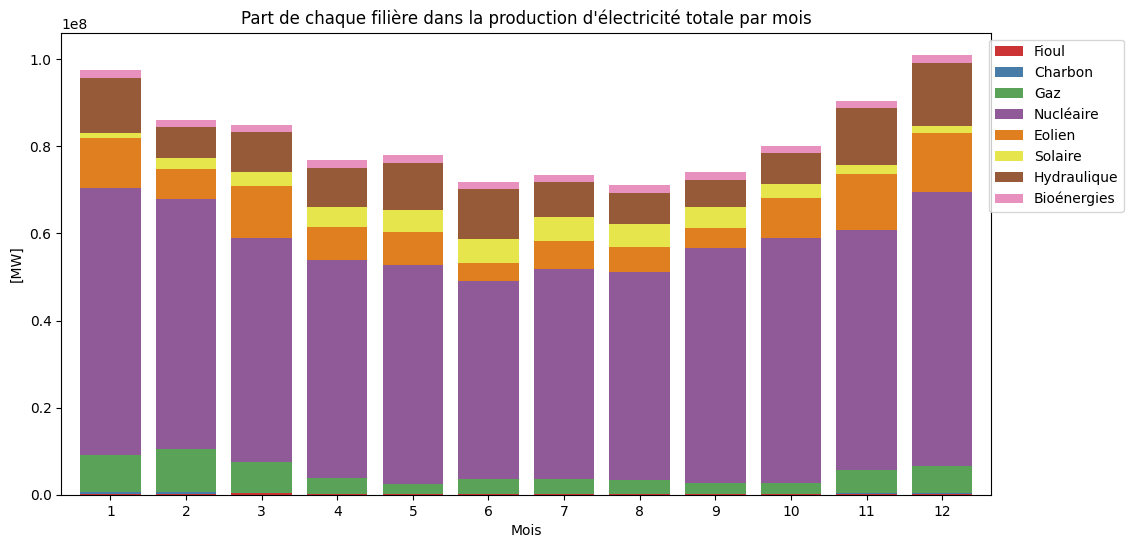

In [46]:
colors = sns.color_palette("Set1", desat=0.75)

### 1ère figure
prod_by_hour = prod_data.groupby(dt_to_float(prod_data.Datetime))[sources].mean()
prod_by_hour.plot.area( figsize=(12,6), xticks=range(0,24,1), color=colors,
                        xlabel="Heure", ylabel="[MW]", 
                        title = "Part de chaque filière dans la production d'électricité par heure", xlim=(0,23.5))
plt.legend(loc="upper right", bbox_to_anchor=(1.12, 1))
plt.show()

### 2ème figure
prod_by_month = prod_data.groupby(prod_data.Datetime.dt.month)[sources].sum()
prod_by_month.plot.bar( figsize=(12,6), stacked=True, rot=0, width=0.8, color=colors,
                        xlabel="Mois", ylabel="[MW]", 
                        title = "Part de chaque filière dans la production d'électricité totale par mois" )
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

On constate ainsi que l'électricité produite en France provient en majeure partie du nucléaire, alors que le fioul et le charbon ont des parts négligeables dans cette production. 

On peut observer ça de façon plus sommaire dans la figure ci-dessous, qui représente le total produit en 2023 pour chaque filière. 

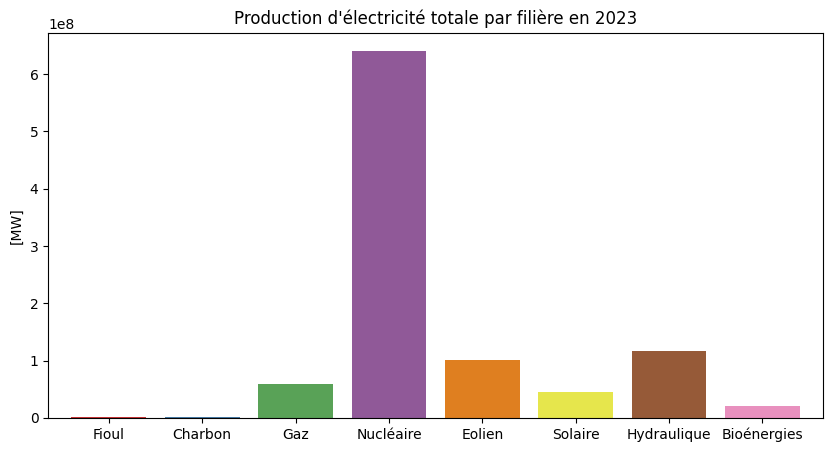

In [47]:
prod_tot = prod_data[sources].sum(axis=0)
prod_tot.plot.bar(figsize=(10,5), color=colors, width=0.8, rot=0,
                 ylabel="[MW]", title="Production d'électricité totale par filière en 2023")
plt.show()